## <a id='ejercicio2'>2. Ejercicio 2: Clasificación de Frutas y Verduras con Transfer Learning</a>

**Descripción:**

Emplea un modelo pre-entrenado y ajusta sus capas finales para clasificar imágenes de diferentes tipos de frutas y verduras utilizando un conjunto de datos público.

García Hernández Mario Yahir

Oscar Correa Saenz

Aguilar Pérez Ricardo

In [ ]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
import os


### 2.2. Carga y Preprocesamiento de Datos

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariogarciahernandez","key":"fe80a105199a1780f6d0ea3f4eeec297"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download moltean/fruits --unzip


Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
 97% 937M/964M [00:07<00:00, 147MB/s]
100% 964M/964M [00:07<00:00, 130MB/s]


In [ ]:
!ls fruits-360_dataset_100x100

fruits-360


In [ ]:
train_dir = 'fruits-360_dataset_100x100'

In [ ]:
import os
import shutil
import random

# Define los directorios de origen y destino
src_dir = 'fruits-360_dataset_100x100/fruits-360/Training'  # Donde están todas las imágenes completas
dst_dir = 'fruits-360_dataset_reducido'  # Nuevo directorio para el subconjunto

# Define el número de imágenes que deseas copiar por clase
num_images = 40

# Asegúrate de que el destino tenga las mismas subcarpetas
for class_dir in os.listdir(src_dir):
    os.makedirs(os.path.join(dst_dir, class_dir), exist_ok=True)

    # Toma un subconjunto aleatorio de imágenes
    images = os.listdir(os.path.join(src_dir, class_dir))
    random.shuffle(images)

    # Filtra solo los archivos de imagen (ignorar directorios)
    image_files = [img for img in images if os.path.isfile(os.path.join(src_dir, class_dir, img))]

    # Copia solo las primeras num_images imágenes
    for image in image_files[:num_images]:
        shutil.copy(os.path.join(src_dir, class_dir, image), os.path.join(dst_dir, class_dir))


In [ ]:
train_dir = 'fruits-360_dataset_reducido'  # Directorio reducido con menos imágenes

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=resnet_preprocess, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Directorio reducido
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,  # Mismo directorio, pero selecciona el subset de validación
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4512 images belonging to 141 classes.
Found 1128 images belonging to 141 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Determina el número de clases basado en los datos cargados
num_classes = train_generator.num_classes

# Crea el modelo usando ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # No entrenar las capas base preentrenadas

# Define tu modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Usa el número de clases detectado
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Debes descargar un conjunto de datos de frutas y verduras. Puedes utilizar uno de los siguientes:

- [Fruits 360 Dataset](https://www.kaggle.com/moltean/fruits)
- [Fruits Fresh and Rotten for Classification](https://www.kaggle.com/srinivasalladi/fruits-fresh-and-rotten-for-classification)

Asegúrate de descomprimir el conjunto de datos y colocar las carpetas de entrenamiento y prueba en directorios adecuados.

### 2.3. Transfer Learning

*Completa esta sección cargando un modelo pre-entrenado, ajustando las capas finales y entrenando tu modelo.*

In [ ]:
# Entrenar el modelo
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 1078s 8s/step - accuracy: 0.5470 - loss: 2.4208 - val_accuracy: 0.9539 - val_loss: 0.1802
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1104s 8s/step - accuracy: 0.9776 - loss: 0.0903 - val_accuracy: 0.9761 - val_loss: 0.0917
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1076s 7s/step - accuracy: 0.9972 - loss: 0.0205 - val_accuracy: 0.9699 - val_loss: 0.1805
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1110s 7s/step - accuracy: 0.9952 - loss: 0.0278 - val_accuracy: 0.9867 - val_loss: 0.0566
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1092s 7s/step - accuracy: 0.9990 - loss: 0.0056 - val_accuracy: 0.9814 - val_loss: 0.1077
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1170s 8s/step - accuracy: 0.9962 - loss: 0.0308 - val_accuracy: 0.9716 - val_loss: 0.1121
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1046s 7s/step - accuracy: 0.9939 - loss: 0.0264 - val_accuracy: 0.9619 - val_loss: 0.1503
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1040s 7s/step - accuracy: 0.9976 - loss: 0.0199 - val_accurac

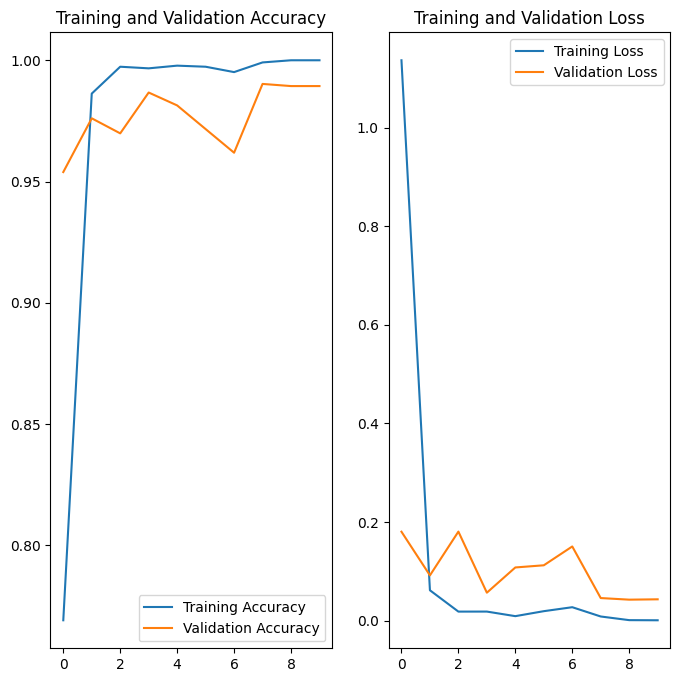

In [ ]:
# Graficar la precisión y la pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Este proyecto implementa un modelo de **Transfer Learning** para la clasificación de frutas y verduras utilizando el dataset **Fruits 360** de Kaggle. Se sigue un enfoque para reducir el tamaño del conjunto de datos, entrenar un modelo preentrenado como **ResNet50**, y evaluar su rendimiento.

### 1. **Reducción del tamaño del conjunto de datos**:
Para hacer el entrenamiento más eficiente, se seleccionan aleatoriamente **100 imágenes por clase** del conjunto de datos original mediante un script en Python. Este proceso asegura que las imágenes seleccionadas mantengan la estructura de directorios necesaria para `ImageDataGenerator`, donde cada clase se almacena en subcarpetas separadas. El código utiliza funciones como `os.listdir` y `shutil.copy` para mover imágenes al nuevo directorio reducido.

### 2. **Cargar y preprocesar los datos**:
Se utiliza `ImageDataGenerator` para realizar el preprocesamiento y la división del conjunto de datos en entrenamiento y validación. El generador aplica la función de preprocesamiento específica de **ResNet50** (`resnet_preprocess`) y divide el conjunto de datos en un 80% para entrenamiento y un 20% para validación usando el parámetro `validation_split`.

### 3. **Definir y compilar el modelo**:
El modelo preentrenado **ResNet50** se carga sin la parte superior (`include_top=False`) y se congela (`trainable=False`) para evitar entrenar las capas base. Se añaden capas densas, incluyendo una capa de **GlobalAveragePooling2D** y una capa densa con activación `softmax` para la clasificación multiclase. El modelo se compila usando el optimizador **Adam** y la función de pérdida **categorical_crossentropy**.

### 4. **Entrenamiento y evaluación**:
El modelo se entrena durante 10 épocas con los datos preprocesados y validados. Posteriormente, se evalúa el rendimiento en el conjunto de validación y se imprimen las métricas de precisión. Además, se grafican las curvas de precisión y pérdida para visualizar el rendimiento del modelo a lo largo de las épocas.

### 5. **Ajuste fino del modelo:
Finalmente, se desbloquean las capas superiores del modelo base para realizar un ajuste fino, permitiendo que el modelo optimice tanto las capas nuevas como algunas de las capas preentrenadas.

Este enfoque permite aprovechar la potencia de un modelo preentrenado como **ResNet50** mientras se ajusta a un conjunto de datos específico de clasificación de frutas y verduras, optimizando el proceso mediante la reducción del conjunto de datos y la transferencia de aprendizaje.